In [25]:
import zipfile
import os

zip_path = "/content/archive (1).zip"
extraction_path = "/content/sample_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

extracted_files = os.listdir(extraction_path)
extracted_files


['README.md',
 'anscombe.json',
 'Data',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_train.csv',
 'california_housing_test.csv']

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [31]:
data_files = os.listdir(os.path.join(extraction_path, 'Data'))
data_files

['SPCAPIT.BO.csv',
 'HAZOOR.BO.csv',
 'ZICOM.BO.csv',
 'FINKURVE.BO.csv',
 'TTL.BO.csv',
 'UNRYLMA.BO.csv',
 'ASSOSTNB.BO.csv',
 'WANBURY.BO.csv',
 'AARVEEDEN.NS.csv',
 'SOWBHAGYA.BO.csv',
 'SHAWGELTIN.BO.csv',
 'SCINDIA.BO.csv',
 'RADIOCITY.BO.csv',
 'ASPIRA.BO.csv',
 'BRADYM.BO.csv',
 'CUBEXTUB.NS.csv',
 'AMRUTANJAN.BO.csv',
 'ZENTEC.BO.csv',
 'VISIONCINE.BO.csv',
 'TATAMETALI.BO.csv',
 'MUNJALSHOW.NS.csv',
 'SIGNETIND.BO.csv',
 'TALBROAUTO.NS.csv',
 'ASITCFIN.BO.csv',
 'WIREFABR.BO.csv',
 'SOMANYCERA.NS.csv',
 'ASHOKLEY.BO.csv',
 'VIRATCRA.BO.csv',
 'UNIABEXAL.BO.csv',
 'CHAMBLFERT.BO.csv',
 'PMCFIN.BO.csv',
 'KCLINFRA.BO.csv',
 'UNIVARTS.BO.csv',
 'B2BSOFT.BO.csv',
 'CENTURYPLY.NS.csv',
 'EON.NS.csv',
 'AVANTIFEED.NS.csv',
 'EASTSILK.BO.csv',
 'ASIANPAINT.NS.csv',
 'TGBHOTELS.NS.csv',
 'JTAPARIA.BO.csv',
 'ZENITHEXPO.NS.csv',
 'INFRABEES.NS.csv',
 'ALPA.BO.csv',
 'MAHAVIRIND.BO.csv',
 'JUBILANT.BO.csv',
 'ADITYA.BO.csv',
 'WALLFORT.BO.csv',
 'BHASKAGR.BO.csv',
 'AKCAPIT.BO.csv',
 '

In [32]:
data = data[['Adj Close']].dropna()

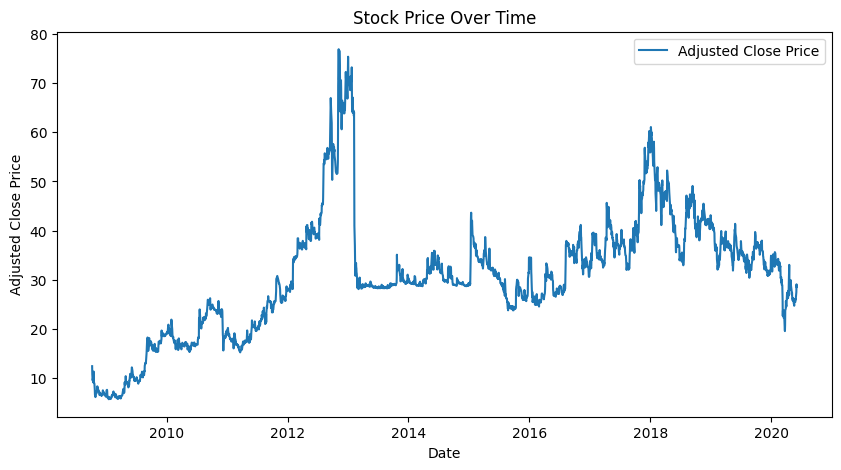

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(data, label='Adjusted Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

In [34]:
data['SMA_50'] = data['Adj Close'].rolling(window=50).mean()
data['SMA_200'] = data['Adj Close'].rolling(window=200).mean()
data['Daily Return'] = data['Adj Close'].pct_change()

In [35]:
data.dropna(inplace=True)

In [36]:
X = data[['Adj Close', 'SMA_50', 'SMA_200', 'Daily Return']]
y = data['Adj Close'].shift(-1)
X = X[:-1]
y = y[:-1]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [42]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
predictions = model.predict(X_test)

In [44]:
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 1.0033596463392012


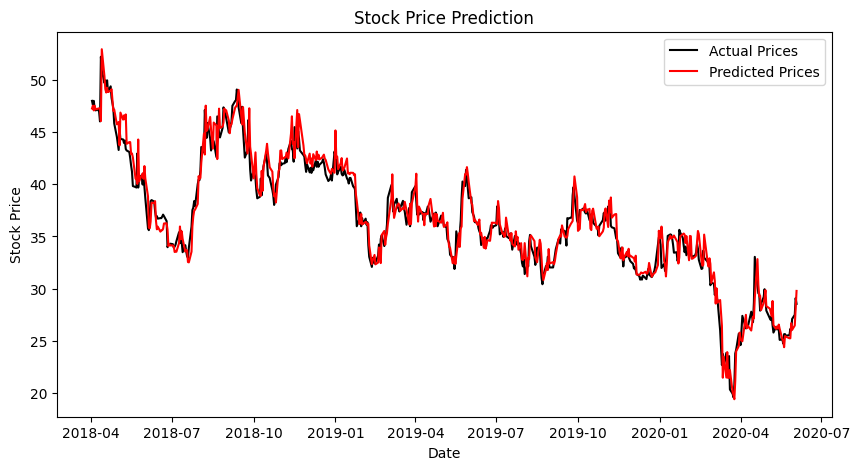

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, color='black', label='Actual Prices')
plt.plot(y_test.index, predictions, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [46]:
last_data_point = X.iloc[-1].values.reshape(1, -1)
future_price_prediction = model.predict(last_data_point)
print(f'Predicted future stock price: {future_price_prediction[0]}')

Predicted future stock price: 29.787812099456787


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
